Obs:

--------------------------------------------------

d calcula a densidade de probabilidade f(x) no ponto;

p calcula a função de probabilidade acumulada F(x)
 no ponto;

q calcula o quantil correspondente a uma dada probabilidade;

r gera uma amostra aleatória da distribuição.

--------------------------------------------------

**Distribuição Binomial**

In [2]:
require(ggplot2)

Loading required package: ggplot2



In [1]:
moeda <- data.frame('cara'=
             rep(c('0',"1","2","3","4"),
                  c(1, 4, 6, 4, 1)))

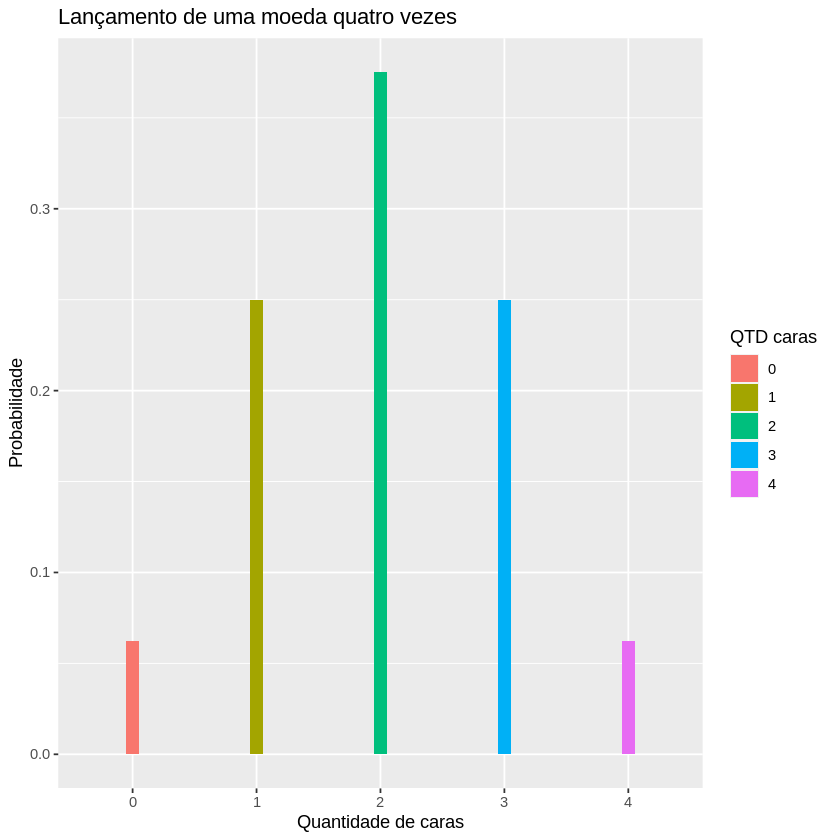

In [4]:
ggplot(moeda, aes(x = cara, y=after_stat(count)/sum(after_stat(count)), fill = cara)) +
  geom_bar(width=0.1) +
  labs(title = "Lançamento de uma moeda quatro vezes",
     x = "Quantidade de caras",
     y = "Probabilidade",
     fill='QTD caras')

A probabilidade de ocorrer cara 2 vezes é a maior. Nas 16 observações, a maioria das vezes apresentou a moeda cara ocorrendo 2 vezes em cada 4 lançamentos.

Agora, o calculo de algumas probabilidades envolvendo esta distribuição.

Probablidade(x = Ocorrer exatamente 2 caras em 4 lançamentos de uma moeda.)

In [5]:
dbinom(x=2, #Calcula a probabilidade de P(X=x)
       size=4, #Quantidade total de lançamentos
       prob=0.5, #Probabilidade inicial de ocorrer o sucesso
       log = FALSE)

[1] 0.375

p(Ocorrer no máximo 3 caras em 4 lançamentos de uma moeda.)


In [6]:
pbinom(q=3, #Quantidade de caras
        size=4, #Quantidade total de lançamentos
        prob=0.5, #Probabilidade inicial de ocorrência (lançar uma moeda uma única vez, qual a probabilidade de ocorrer cara)
        lower.tail = TRUE #P[X<= x]
        )

[1] 0.9375

Plot do gráfico de probabilidades

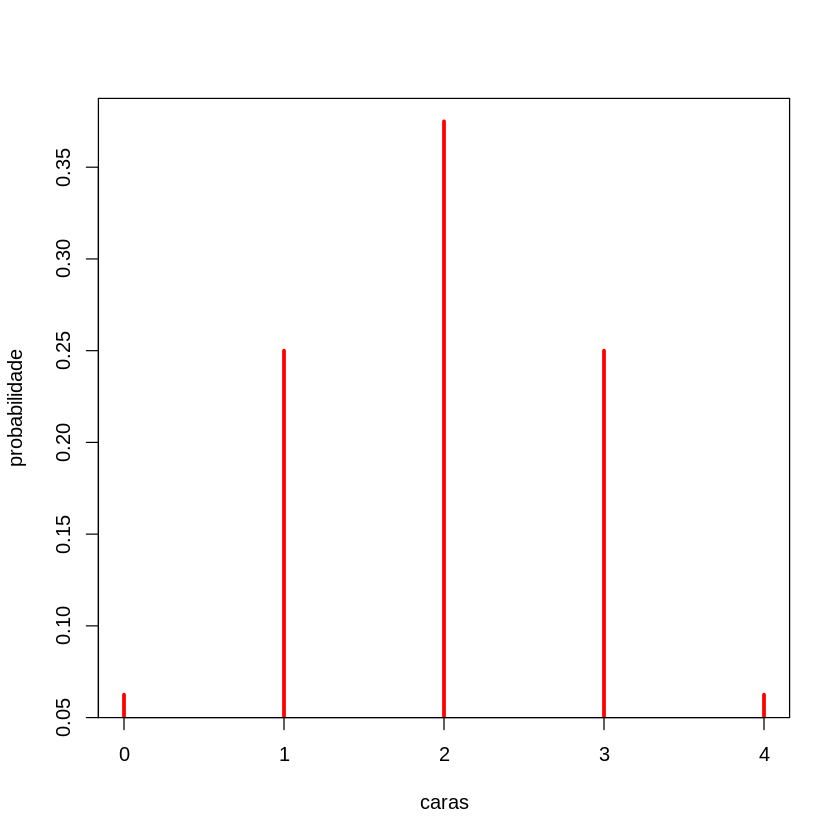

In [7]:
caras <- 0:4
probabilidade <- dbinom(x=caras,   # Quantidade de sucessos
                        size = 4,  # Quantidade de lançamentos
                        prob=0.5)  # Probabilidade a priori de sucesso

plot(caras, probabilidade,
     type='h',   # Desenha uma linha vertical
     col='red',   # Cor da linha
     lwd=3)      # Espessura da linha/ponto

Exemplo 1 : Suponha que numa linha de produção a probabilidade de se obter uma peça defeituosa (sucesso) é p=0,5.

Toma-se uma amostra de 10 peças para serem inspecionadas. Em que X é o número de peças defeituosa produzidas em único dia.

Qual é a probabilidade de um remessa com 10 peças conter pelo menos quatro peças defeituosa.

Note que, Pelos quatro significa, P[X≥4], isto é equivalente a 1−P[X<4] ou 1−P[X≤3]

In [8]:
 pbinom(q=3, #Quantidade de peças defeituosas
        size=10, #Quantidade total de peças
        prob=0.5, #Probabilidade inicial de peça defeituosa
        lower.tail = FALSE #P[X> x]
        )

[1] 0.828125

Exemplo 2: Considere nascimentos de 4 filhotes de coelhos de uma determinada raça. Nesta raça há um distúrbio genético e a probabilidade de nascer fêmea é 5/8.

Gráfico de Probabilidades:

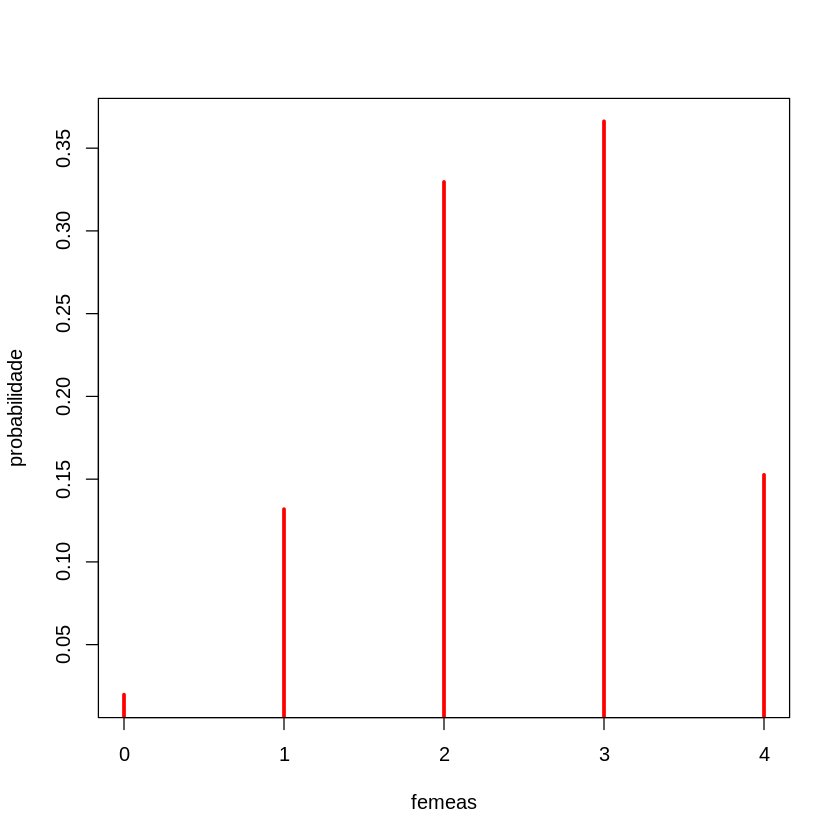

In [9]:
femeas <- 0:4
probabilidade <- dbinom(x=femeas,   # Quantidade de sucessos
                        size = 4,   # Quantidade de nascimento
                        prob=5/8)   # Probabilidade a priori de sucesso

plot(femeas, probabilidade,
     type='h',   # Desenha uma linha vertical
     col='red',   # Cor da linha
     lwd=3)      # Espessura da linha/ponto

Probabilidade de nascer pelo menos três fêmeas.P[X≥3]=P[X>2] = 1 - P[X<3] ou 1−P[X≤2]

In [10]:
 pbinom(q=2,         # Quantidade de fêmeas
        size=4,      # Quantidade total de filhores
        prob=5/8,    # Probabilidade inicial de fêmea
        lower.tail = FALSE #P[X> x]
        )

[1] 0.5187988

**Distribuição de Poisson**

Problema: Nos últimos 30 dias foram registrados a quantidade de acidentes por dia em uma determinada cidade.

In [11]:
acidente <- data.frame('acd'= c(9, 6, 9, 11, 10, 10, 6, 10, 9, 4, 8, 10,
                                10, 7, 9, 11, 4, 6, 11, 8, 5, 3, 5, 9, 6))

table(acidente$acd)


 3  4  5  6  7  8  9 10 11 
 1  2  2  4  1  2  5  5  3 

Verificando o Plot

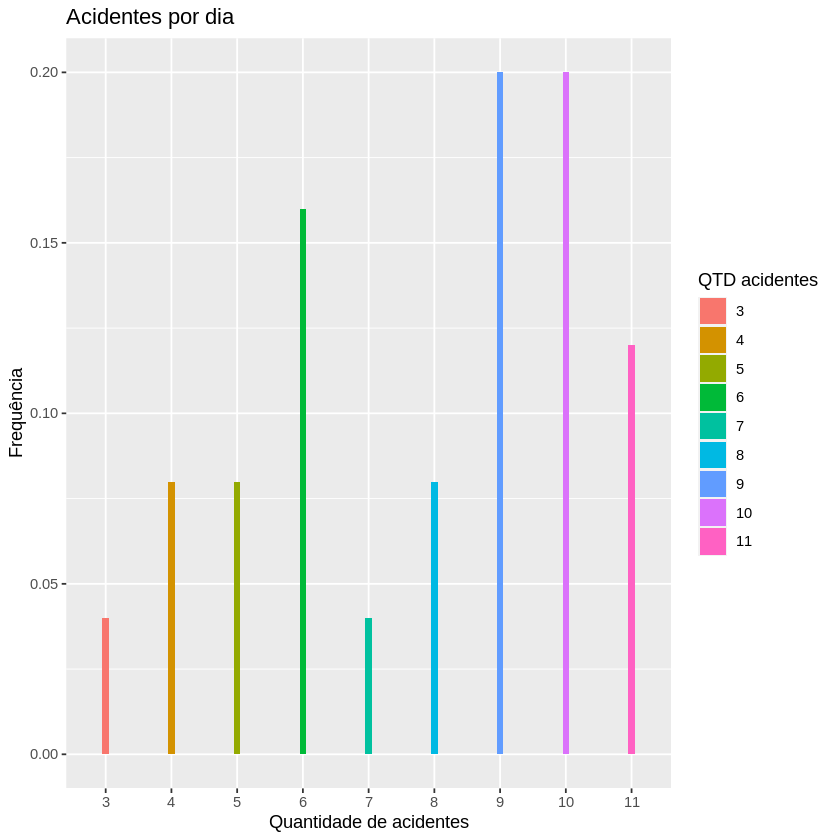

In [13]:
ggplot(acidente, aes(x = as.factor(acd), y=after_stat(count)/sum(after_stat(count)),
                     fill = as.factor(acd))) +
  geom_bar(width=0.1) +
  labs(title = "Acidentes por dia",
     x = "Quantidade de acidentes",
     y = "Frequência",
     fill='QTD acidentes')

A questão aqui é que não temos condições de afirmar qual a quantidade máxima de acidentes que podem ocorrer em um único dia.

Desta forma, o modelos de Poisson é o sugerido para dados de contagem dentro de um intervalo (temporal ou espacial) fixo.

In [14]:
# Média de acidentes por dia
mean(acidente$acd)
# DP da qtd de acidentes por dia
sd(acidente$acd)

[1] 7.84

[1] 2.44404

Observando o gráfico parece razoável aformar que: a probabilidade de ocorrer 9 acidentes em um único dia é de 0,20.

Mas, olhando para a amostra, não somos capazes de afirmar qual a probabilidade de ocorrer 12 acidentes em um único dia.

Para responder a este questionamente, temos que fazer o uso de um modelo probabilístico, neste caso, Poisson.

Neste modelo, uma estimativa relacionada ao parâmetro λ deve ser a média amostral. Logo, podemos utilizar λ=8

P( x = Ocorrer 12 acidentes em um único dia)

In [15]:
dpois(x = 12,
      lambda = 8)

[1] 0.0481268

Visualizando gráficamente as probabilidades

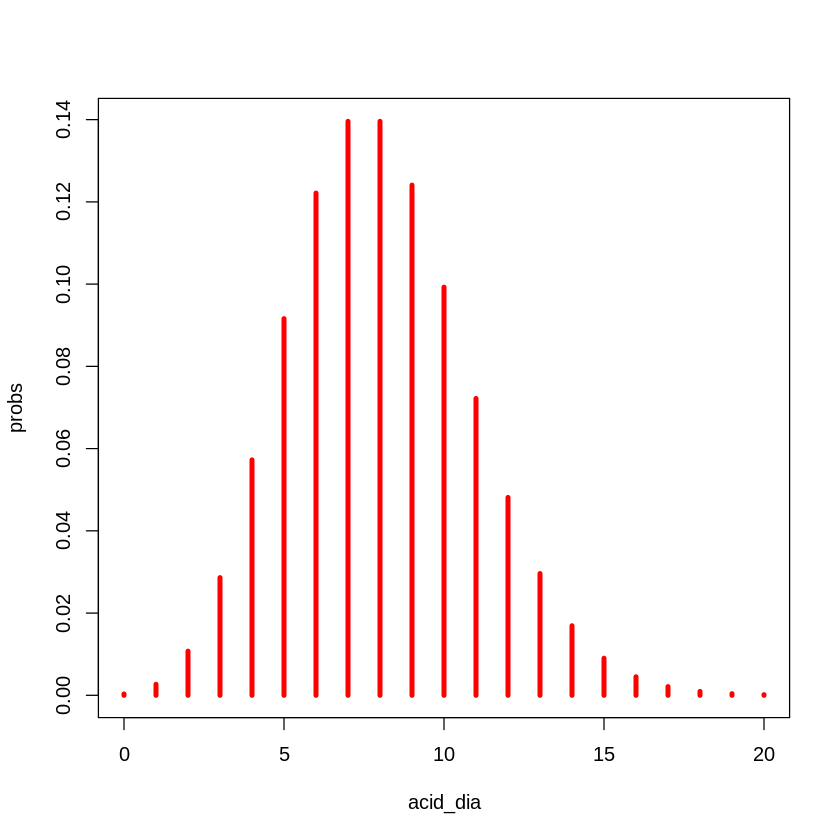

In [16]:
acid_dia <- 0:20
probs <- dpois(x = acid_dia,
              lambda = 8)

plot(acid_dia, probs,
     type='h',   # Desenha uma linha vertical
     col='red',   # Cor da linha
     lwd=4)      # Espessura da linha/ponto

Exemplo: Uma empresa de telefonia recebe, em média, cinco chamadas por minuto.

O gráfico de probabilidades:

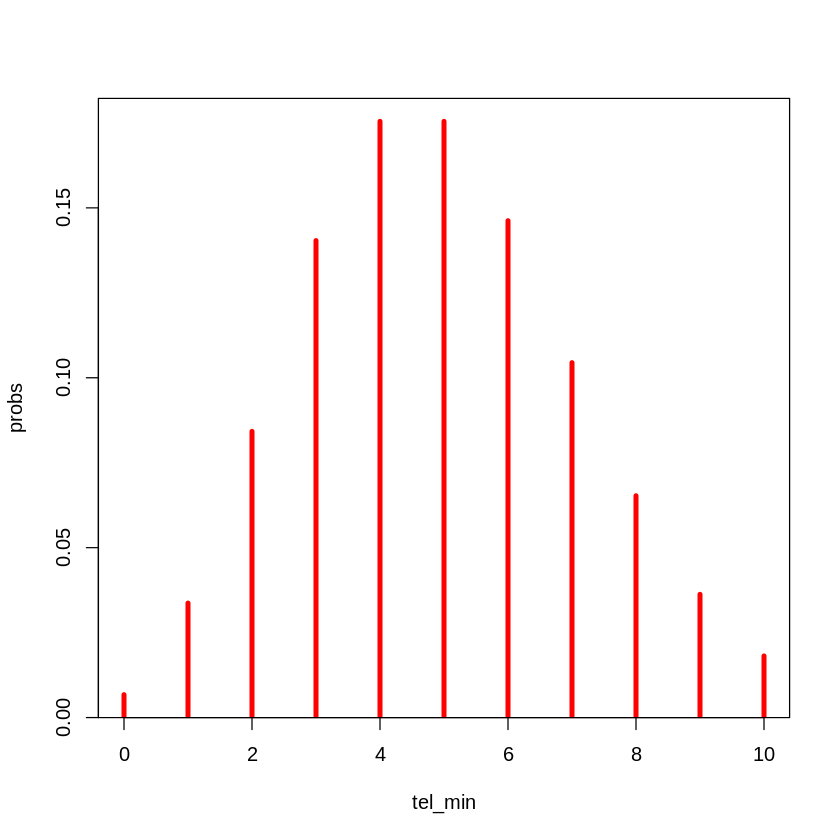

In [17]:
tel_min <- 0:10
probs <- dpois(x = tel_min,
              lambda = 5)

plot(tel_min, probs,
     type='h',   # Desenha uma linha vertical
     col='red',   # Cor da linha
     lwd=4)      # Espessura da linha/ponto

A probabilidade de que a empresa não receba chamada durante um intervalo de um minuto.

In [18]:
dpois(x = 0, lambda = 5)

[1] 0.006737947

Algumas outras distribuições discretas

In [19]:
# Binomial Negativa        dnbinom(n,size, prob)

# Geométrica               dgeom(n,prob)

# Hipergeometrica          dhyper(nn, m, n, k)

**Distribuição Normal**

In [21]:
clim_dou <- read.csv2("/content/clim_dou.csv")
head(clim_dou)

,data,Tem_max,Tem_min,Chuva,Ano,Meses
,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,01/01/1980,25.0,11.0,0,1980,1
2,02/01/1980,28.2,12.1,0,1980,1
3,03/01/1980,30.5,14.8,0,1980,1
4,04/01/1980,31.9,18.7,0,1980,1
5,05/01/1980,31.8,18.1,0,1980,1
6,06/01/1980,30.2,18.2,0,1980,1


Vamos selecionar apenas o mês de janeiro

In [22]:
jan = subset(clim_dou, Meses==1)

Vamos construir o gráfico de histograma para a temperatura máxima diária

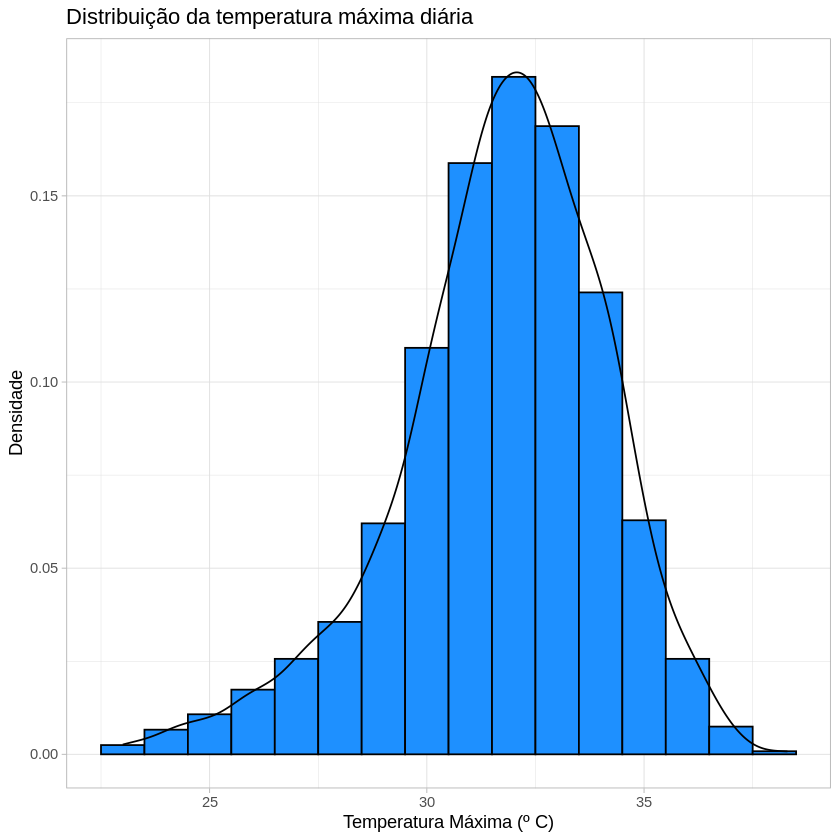

In [23]:
ggplot(jan, aes(x = Tem_max, ..density..)) +

  geom_histogram(binwidth = 1,     # Amplitude da classe
                 fill = 'dodgerblue',
                 color = 'black') +

  labs(title = "Distribuição da temperatura máxima diária",
       x = "Temperatura Máxima (º C)",
       y = "Densidade") +

  geom_density(alpha = 0.5)+     # Linha de densidade

  theme_light()

Problema: Como calcular a probabilidade, em um único dia, da temperatura máxima ser superior a 36ºC?

Neste problema temos o cálculo de área, o qual envolve o cálculo de integral. Mas qual função devo integrar? Para responder a este questionamento, vamos verificar se a função de densidade Normal é adequada para modelar esta variável.

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


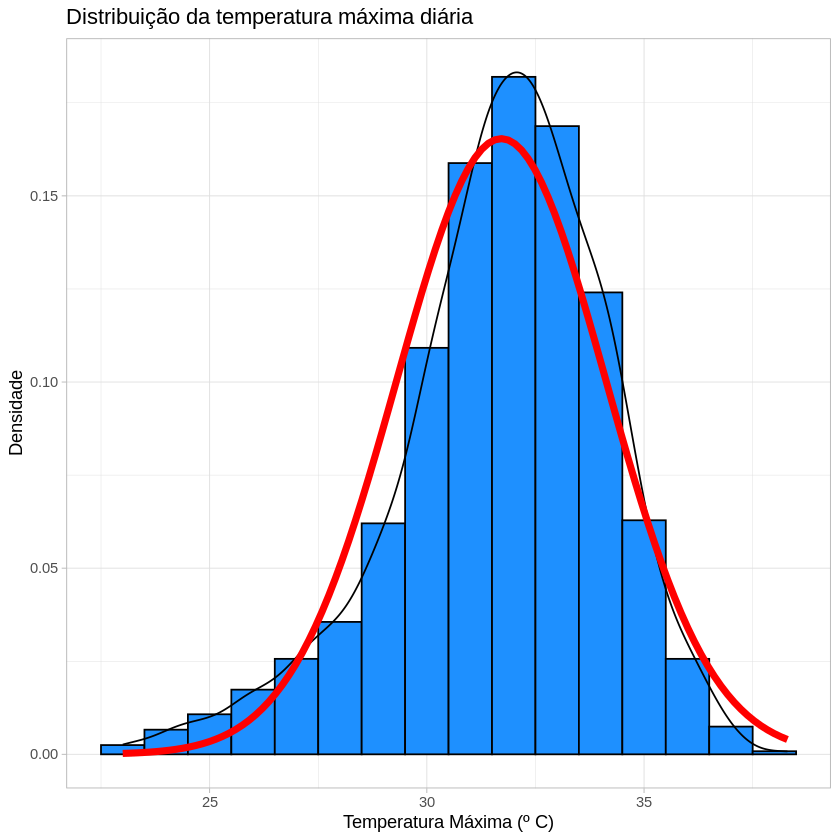

In [24]:
ggplot(jan, aes(x = Tem_max)) +

  geom_histogram(aes(y = ..density..),
                 binwidth = 1,     # Amplitude da classe
                 fill = 'dodgerblue',
                 color = 'black') +

  labs(title = "Distribuição da temperatura máxima diária",
       x = "Temperatura Máxima (º C)",
       y = "Densidade") +

  geom_density(alpha = 0.5)+     # Linha de densidade

  stat_function(fun = dnorm, color='red', size = 2,
                args = list(mean = mean(jan$Tem_max),
                            sd = sd(jan$Tem_max)))+   # Linha de densidade da distribuição Normal

  theme_light()

In [25]:
##  média de janeiro
mean(jan$Tem_max)
## desvio padrão de janeiro
sd(jan$Tem_max)

[1] 31.7134

[1] 2.412448

Então calculamos a probabilidade seguindo o modelo normal.

In [26]:
pnorm(q = 36,        # x=36
      mean = 31.71,  # média
      sd = 2.41,     # Desvio padrão
      lower.tail = FALSE # Calcula P[X > x]
      )

[1] 0.03753119


Assim, a temperatura máxima em um único dia exceder 36 ºC é de 0,04

Agora a probabilidade da temperatura máxima em um único dia em janeiro ser Inferior a 30 ºC

In [27]:
pnorm(q = 30,        # x=30
      mean = 31.71,  # média
      sd = 2.41,     # Desvio padrão
      lower.tail = TRUE # Calcula P[X ??? x]
      )

[1] 0.2389936

Agora a probabilidade da temperatura máxima em um único dia em janeiro Está entre 30 ºC e 35 ºC

In [28]:
pnorm(q = c(30, 35),        # x=30
      mean = 31.71,  # média
      sd = 2.41,     # Desvio padrão
      lower.tail = TRUE # Calcula P[X ??? x]
      )

[1] 0.2389936 0.9138963

In [29]:
0.9138963 - 0.2389936

[1] 0.6749027

Agora para a temperatura mínima diária de janeiro, é construido um gráfico histograma em que seja possível analisar se a distribuição Normal é adequada para modelar a temperatura mínima

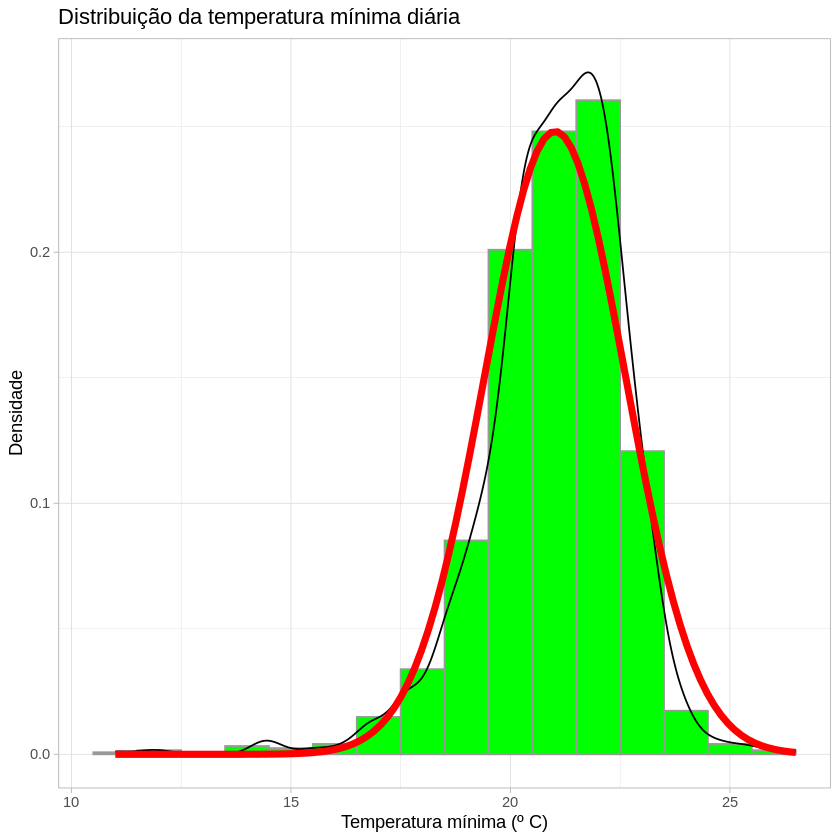

In [30]:
ggplot(jan, aes(x = Tem_min)) +

  geom_histogram(aes(y = ..density..),
                 binwidth = 1,     # Amplitude da classe
                 fill = 'green',
                 color = 'gray60') +

  labs(title = "Distribuição da temperatura mínima diária",
       x = "Temperatura mínima (º C)",
       y = "Densidade") +

  geom_density(alpha = 0.5)+     # Linha de densidade

  stat_function(fun = dnorm, color='red', size = 2,
                args = list(mean = mean(jan$Tem_min),
                            sd = sd(jan$Tem_min)))+   # Linha de densidade da distribuição Normal

  theme_light()

Probabilidade da temperatura mínima em um único dia de janeiro ser inferior a 20 ºC

In [31]:
## Média desse modelo
mean(jan$Tem_min)
## desvio padrão desse modelo
sd(jan$Tem_min)

[1] 21.01679

[1] 1.60775

In [32]:
pnorm(q = 20,        # x=20
      mean = 21.02,  # média
      sd = 1.61,     # Desvio padrão
      lower.tail = TRUE # Calcula P[X ??? x]
      )

[1] 0.2631904

Probabilidade da temperatura mínima em um único dia de janeiro ser superior a 22 ºC

In [33]:
pnorm(q = 22,            # x=22
      mean = 21.02,      # média
      sd = 1.61,         # Desvio padrão
      lower.tail = FALSE # Calcula P[X > x]
      )

[1] 0.2713631

**Distribuição Exponencial**

Exemplo: O tempo até a falha do ventilador de motores a diesel tem uma distribuição Exponencial com parâmetro λ=1/28700 horas.

Qual a probabilidade de um destes ventiladores falhar nas primeiras 24000 horas de funcionamento?

In [34]:
x<- 24000
razao<- 1/28700
prob<-pexp(x,razao);prob

[1] 0.5666619

Ou seja, a probabilidade de um destes ventiladores falhar nas primeiras 24 mil horas de funcionamento é de, aproximadamente, 56,7%

**Quantil de uma Distribuição**

In [35]:
qf(0.975,12,10) # Distribuição F
qt(0.9,10) # Distribuição T
qchisq(0.975,12) # Distribuição qui-quadrado
qnorm(0.95,120,15) # Exemplo da normal : Qual deve ser o tempo de prova de modo a permitir que 95% dos vestibulandos terminem no prazo estipulado?


[1] 3.620945

[1] 1.372184

[1] 23.33666

[1] 144.6728

**Gerar números aleatórios de uma distribuição de interesse**

In [36]:
n=5
t <- rt(n,10);t # Distribuição T

normalp <- rnorm(10);normalp # Distribuição Normal Padrão

normal <- rnorm(10,2,3); normal # Distribuição Normal

bino<-rbinom(10,10,0.3);bino # Distribuição Binomial

[1] 1.0621549 0.8193086 1.5043785 0.2519685 0.3885182

[1] -0.64069472 -0.89853869  0.71804874 -0.88153471  0.80049839  0.91365475
 [7] -0.01757094  0.25372947  0.42142575  0.43043265

[1]  4.2540542  2.6841404  4.7893732 -2.4138911 -4.5783106  2.7226958
 [7]  1.3629298  3.2596243  1.0996038  0.3786031

[1] 3 4 4 4 6 2 5 4 2 2

In [37]:
# Outras Distribuições

#Uniforme          runif(n, min=0, max=1)
#Exponencial       rexp(n, rate=1)
#F                 rf(n, df1, df2)
#Quiquadrado       rchisq(n, df)
#Gama              rgamma(n, shape, scale=1)
#Beta              rbeta(n, shape1, shape2) beta
#Log- Normal       rlnorm(n, meanlog=0, sdlog=1) lognormal
#Cauchy            rcauchy(n, location=0, scale=1) Cauchy